In [2]:
import pandas as pd # For creating dataframes and calculating correlation matrices.
from pandas.api.types import CategoricalDtype # For correctly setting some dataframe colummns as being of categorical type

from pathlib import Path # For defining the path directory in which the data is stored

import seaborn as sn   # For creating visual representations
import matplotlib
import matplotlib.pyplot as plt # of correlation matrices.

import numpy as np #For numerical opertions

import networkx as nx
#import community as community_louvain
import matplotlib.cm as cm


In [3]:
#Read .csv

#Desity
density_2004 = pd.read_csv('Metrics/density_2004.csv',index_col=0)
density_2009 = pd.read_csv('Metrics/density_2009.csv',index_col=0)
density_2014 = pd.read_csv('Metrics/density_2014.csv',index_col=0)
density_2019 = pd.read_csv('Metrics/density_2019.csv',index_col=0)

#Transition
Transition_04_09 = pd.read_csv('Metrics/transition_04_09.csv',index_col=0)
Transition_04_14 = pd.read_csv('Metrics/transition_04_14.csv',index_col=0)
Transition_04_19 = pd.read_csv('Metrics/transition_04_19.csv',index_col=0)

Transition_09_14 = pd.read_csv('Metrics/transition_09_14.csv',index_col=0)
Transition_09_19 = pd.read_csv('Metrics/transition_09_19.csv',index_col=0)

Transition_14_19 = pd.read_csv('Metrics/transition_14_19.csv',index_col=0)

#Underdeveloped

underdeveloped_04_09 = pd.read_csv('Metrics/underdeveloped_04_09.csv',index_col=0)
underdeveloped_04_14 = pd.read_csv('Metrics/underdeveloped_04_14.csv',index_col=0)
underdeveloped_04_19 = pd.read_csv('Metrics/underdeveloped_04_19.csv',index_col=0)

underdeveloped_09_14 = pd.read_csv('Metrics/underdeveloped_09_14.csv',index_col=0)
underdeveloped_09_19 = pd.read_csv('Metrics/underdeveloped_09_19.csv',index_col=0)

underdeveloped_14_19 = pd.read_csv('Metrics/underdeveloped_14_19.csv',index_col=0)

#Developed

developed_04 = pd.read_csv('Metrics/developed_04.csv',index_col=0)
developed_09 = pd.read_csv('Metrics/developed_09.csv',index_col=0)
developed_14 = pd.read_csv('Metrics/developed_14.csv',index_col=0)
developed_19 = pd.read_csv('Metrics/developed_19.csv',index_col=0)

#Discovery Factor

Discovery_04_09 = pd.read_csv('Metrics/discovery_04_09.csv',index_col=0)
Discovery_04_14 = pd.read_csv('Metrics/discovery_04_14.csv',index_col=0)
Discovery_04_19 = pd.read_csv('Metrics/discovery_04_19.csv',index_col=0)
Discovery_09_14 = pd.read_csv('Metrics/discovery_09_14.csv',index_col=0)
Discovery_09_19 = pd.read_csv('Metrics/discovery_09_19.csv',index_col=0)
Discovery_14_19 = pd.read_csv('Metrics/discovery_14_19.csv',index_col=0)

#Proximity 

#Read excel

Prox_2004_df = pd.read_excel("edo-cae_04-19.xlsx", sheet_name='Prox04').set_index('Row Labels')
Prox_2009_df = pd.read_excel("edo-cae_04-19.xlsx", sheet_name='Prox09').set_index('Row Labels')
Prox_2014_df = pd.read_excel("edo-cae_04-19.xlsx", sheet_name='Prox14').set_index('Row Labels')
Prox_2019_df = pd.read_excel("edo-cae_04-19.xlsx", sheet_name='Prox19').set_index('Row Labels')

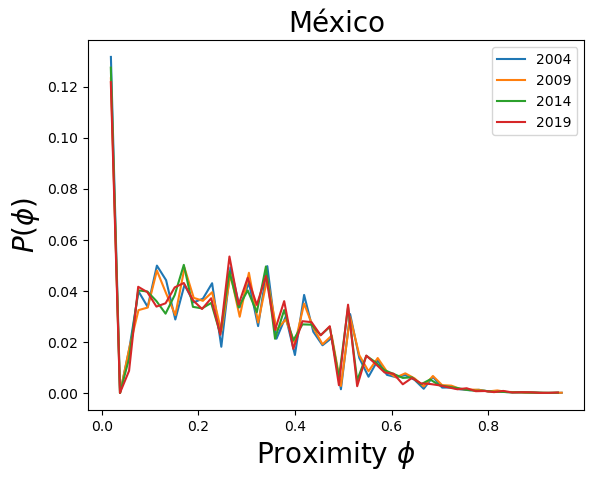

In [4]:
# Get columns that contain only numeric values
Prox_2004_num = Prox_2004_df.select_dtypes(include='number')
Prox_2009_num = Prox_2009_df.select_dtypes(include='number')
Prox_2014_num = Prox_2014_df.select_dtypes(include='number')
Prox_2019_num = Prox_2019_df.select_dtypes(include='number')

#Make array from matrixes
Prox_2004_array =  [prox for prox in np.matrix(Prox_2004_num).A1 if prox!=1]

Prox_2009_array =  [prox for prox in np.matrix(Prox_2009_num).A1 if prox!=1]

Prox_2014_array =  [prox for prox in np.matrix(Prox_2014_num).A1 if prox!=1]

Prox_2019_array =  [prox for prox in np.matrix(Prox_2019_num).A1 if prox!=1]



#Histograms

bins=50

count_04,base_04 = np.histogram(Prox_2004_array, bins=bins,density=False)
count_09,base_09 = np.histogram(Prox_2009_array, bins=bins,density=False)
count_14,base_14 = np.histogram(Prox_2014_array, bins=bins,density=False)
count_19,base_19 = np.histogram(Prox_2019_array, bins=bins,density=False)


#Probability

#Probability

prob_dens_04 = count_04/len(Prox_2004_array)
prob_dens_09 = count_09/len(Prox_2009_array)
prob_dens_14 = count_14/len(Prox_2014_array)
prob_dens_19 = count_19/len(Prox_2019_array)


plt.plot(base_04[1:len(base_04)],prob_dens_04,label= '2004')
plt.plot(base_09[1:len(base_09)],prob_dens_09,label= '2009')
plt.plot(base_14[1:len(base_14)],prob_dens_14,label= '2014')
plt.plot(base_19[1:len(base_19)],prob_dens_19,label= '2019')



plt.xlabel(r'Proximity $\phi$',size=20)
plt.ylabel(r'$P(\phi)$',size=20)
plt.title('México',size=20)
plt.legend()
plt.show()


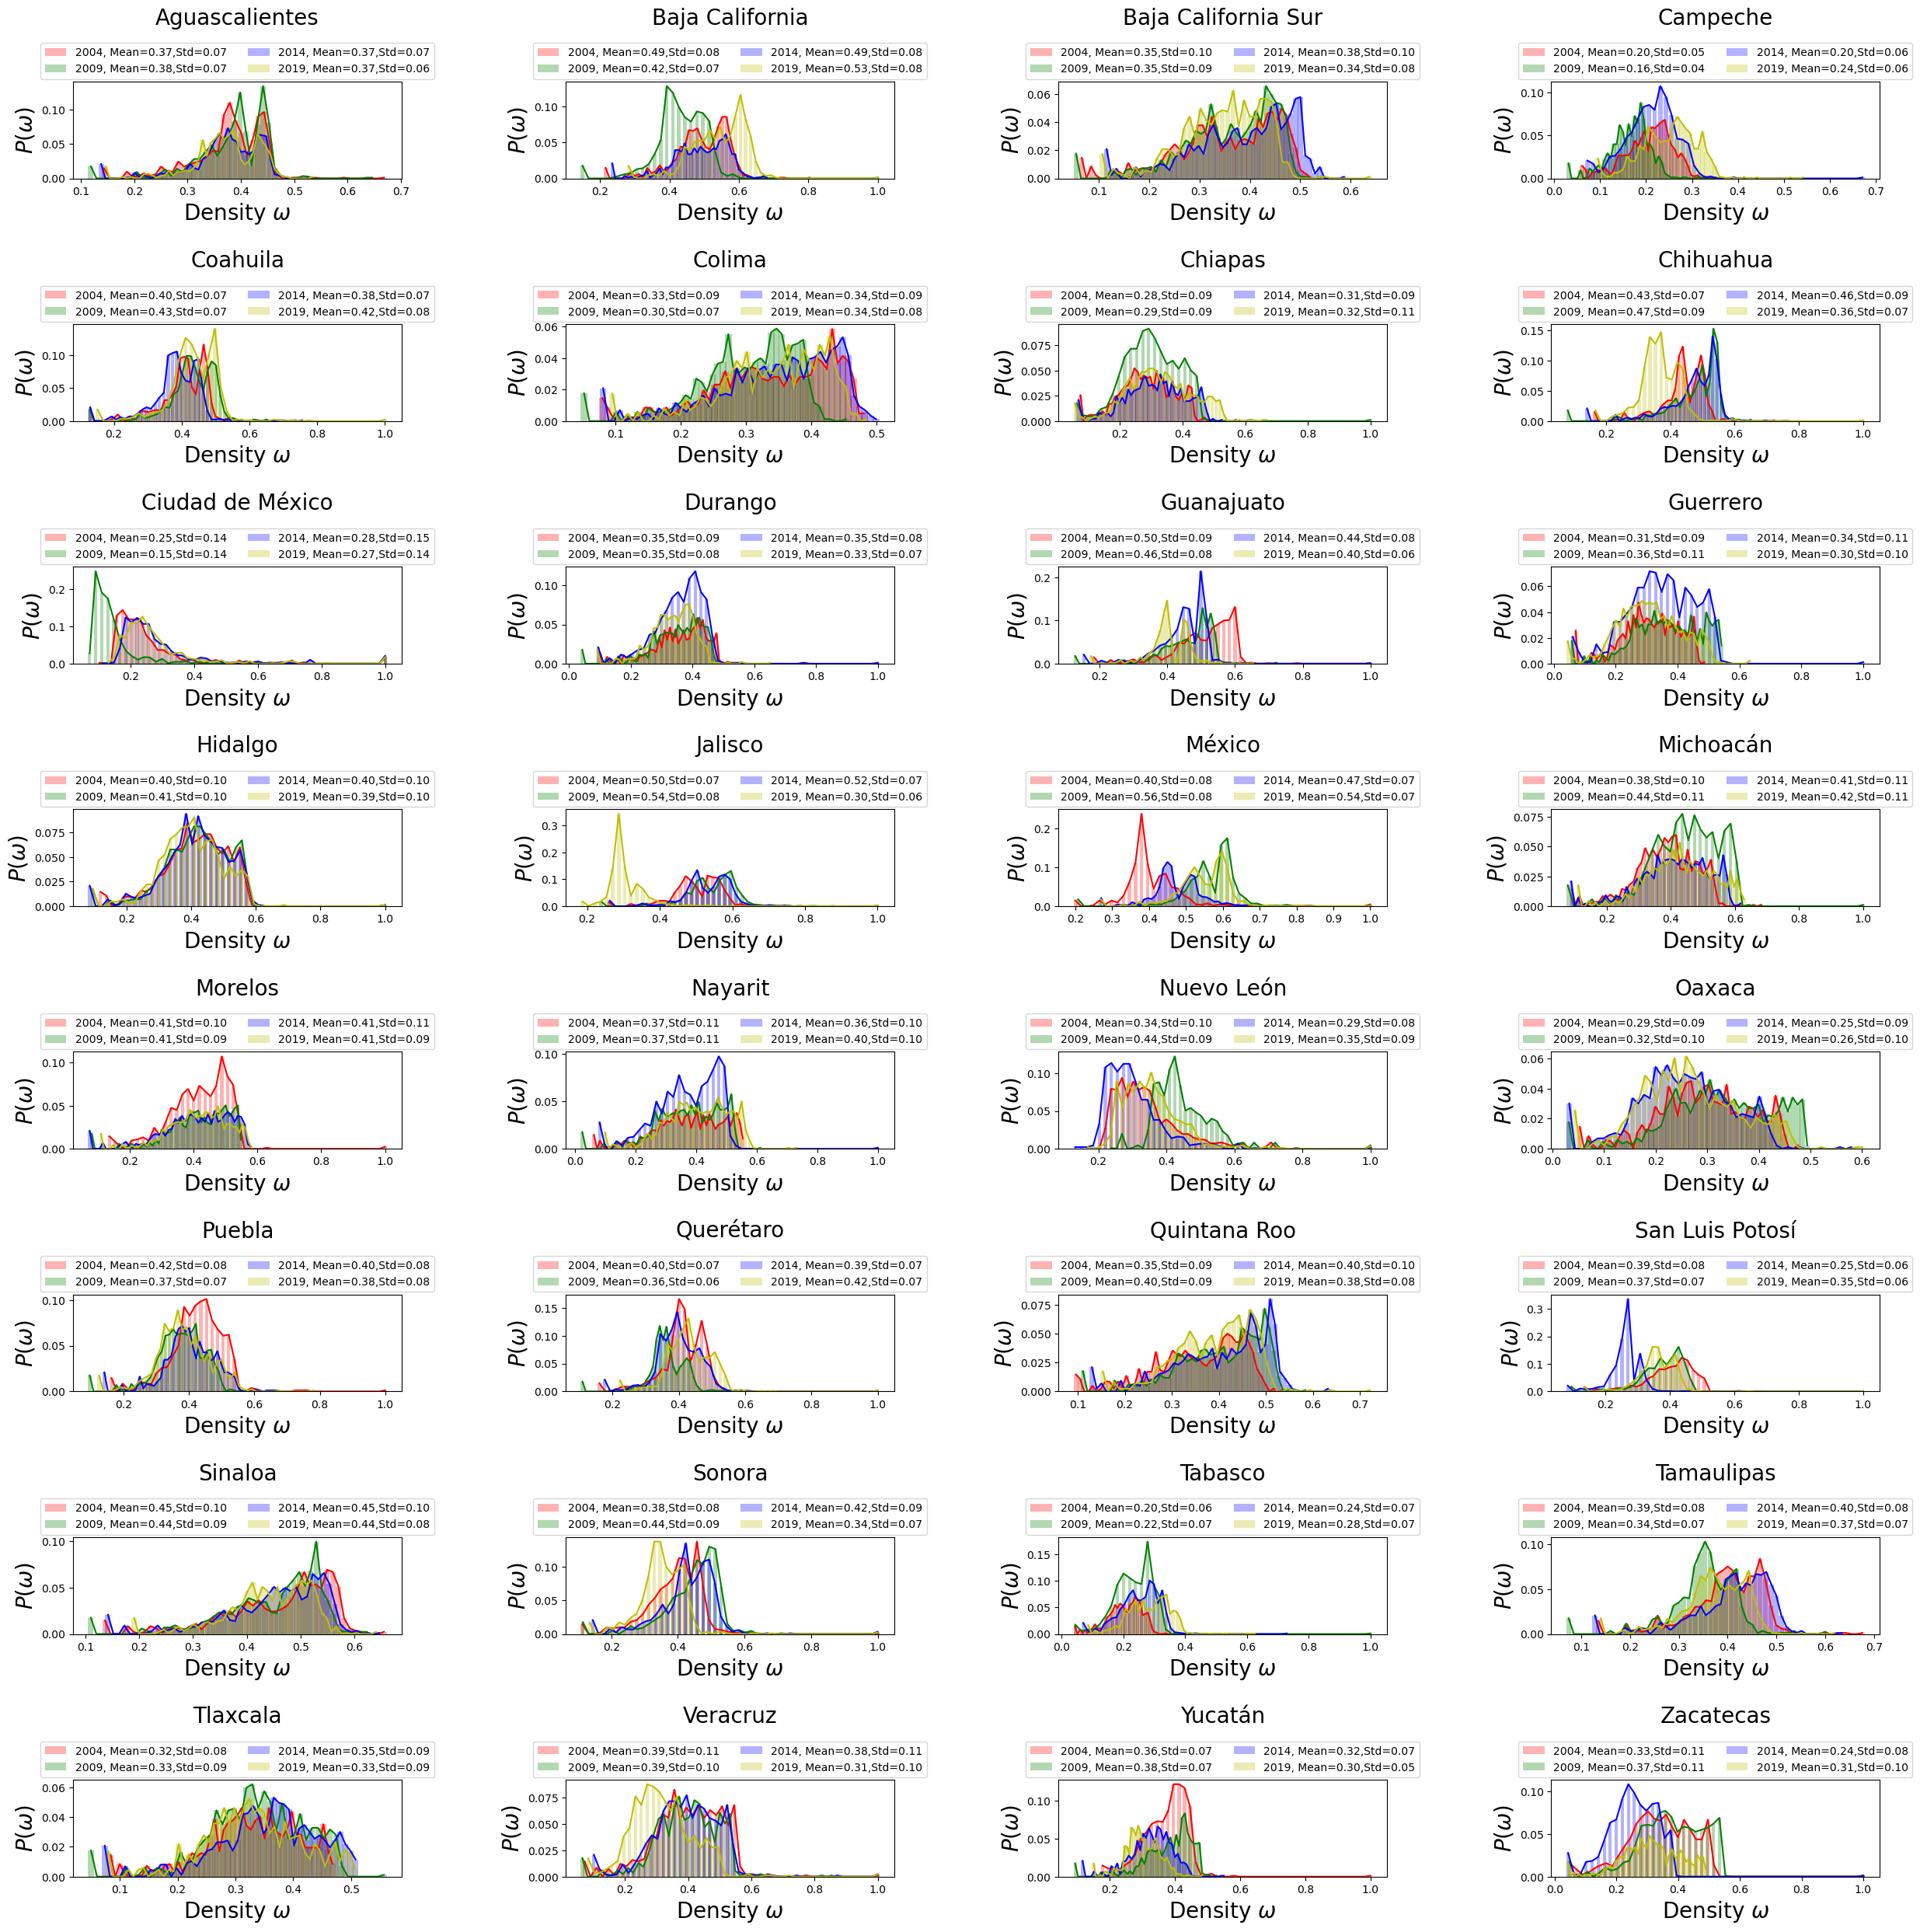

In [5]:
Estados=['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua',
       'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1.5, wspace=0.5)

axs = axs.ravel()

for i,Estado in enumerate(Estados):
    # Get columns that contain only numeric values in Estado
    density_2004_num = density_2004[density_2004['Estado']==Estado].select_dtypes(include='number')
    density_2009_num = density_2009[density_2009['Estado']==Estado].select_dtypes(include='number')
    density_2014_num = density_2014[density_2014['Estado']==Estado].select_dtypes(include='number')
    density_2019_num = density_2019[density_2019['Estado']==Estado].select_dtypes(include='number')

    #Make array from matrixes
    density_2004_array =  np.matrix(density_2004_num).A1

    density_2009_array =  np.matrix(density_2009_num).A1

    density_2014_array =  np.matrix(density_2014_num).A1

    density_2019_array =  np.matrix(density_2019_num).A1

    #Histograms

    bins=50

    count_04,base_04 = np.histogram(density_2004_array, bins=bins,density=False)
    count_09,base_09 = np.histogram(density_2009_array, bins=bins,density=False)
    count_14,base_14 = np.histogram(density_2014_array, bins=bins,density=False)
    count_19,base_19 = np.histogram(density_2019_array, bins=bins,density=False)
    
    #plt.plot(base_04[1:len(base_04)],count_04,label= '2004')
    #plt.plot(base_09[1:len(base_09)],count_09,label= '2009')
    #plt.plot(base_14[1:len(base_14)],count_14,label= '2014')
    #plt.plot(base_19[1:len(base_19)],count_19,label= '2019')


    #Probability

    prob_dens_04 = count_04/len(density_2004_array)
    prob_dens_09 = count_09/len(density_2009_array)
    prob_dens_14 = count_14/len(density_2014_array)
    prob_dens_19 = count_19/len(density_2019_array)

    #plt.plot(base_04[1:len(base_04)],prob_dens_04,label= '2004')
    #plt.plot(base_09[1:len(base_09)],prob_dens_09,label= '2009')
    #plt.plot(base_14[1:len(base_14)],prob_dens_14,label= '2014')
    #plt.plot(base_19[1:len(base_19)],prob_dens_19,label= '2019')
    
    #mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
    #plt.plot(base_04[1:len(base_04)],prob_dens_04,label= f'2004, Mean={mu_04:.2f},Std={sigma_04:.2f}')
    #mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
    #plt.plot(base_09[1:len(base_09)],prob_dens_09,label= f'2009, Mean={mu_09:.2f},Std={sigma_09:.2f}')
    #mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
    #plt.plot(base_14[1:len(base_14)],prob_dens_14,label=f'2014, Mean={mu_14:.2f},Std={sigma_14:.2f}')
    #mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
    #plt.plot(base_19[1:len(base_19)],prob_dens_19,label= f'2019, Mean={mu_19:.2f},Std={sigma_19:.2f}')
    

    #mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
    #axs[i].plot(base_04[1:len(base_04)],prob_dens_04,label= f'2004, Mean={mu_04:.2f},Std={sigma_04:.2f}')
    #mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
    #axs[i].plot(base_09[1:len(base_09)],prob_dens_09,label= f'2009, Mean={mu_09:.2f},Std={sigma_09:.2f}')
    #mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
    #axs[i].plot(base_14[1:len(base_14)],prob_dens_14,label=f'2014, Mean={mu_14:.2f},Std={sigma_14:.2f}')
    #mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
    #axs[i].plot(base_19[1:len(base_19)],prob_dens_19,label= f'2019, Mean={mu_19:.2f},Std={sigma_19:.2f}')
    
   # mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
   # axs[i].plot(base_04[1:len(base_04)],prob_dens_04,label= f'2004')
    #mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
    #axs[i].plot(base_09[1:len(base_09)],prob_dens_09,label= f'2009')
    #mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
    #axs[i].plot(base_14[1:len(base_14)],prob_dens_14,label=f'2014')
    #mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
    #axs[i].plot(base_19[1:len(base_19)],prob_dens_19,label= f'2019')
    
    mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
    axs[i].plot(base_04[1:len(base_04)],prob_dens_04,color="r")
    axs[i].bar(base_04[1:len(base_04)],prob_dens_04,
               label= f'2004, Mean={mu_04:.2f},Std={sigma_04:.2f}'
               ,alpha=0.3,width=0.01,color="r")
    mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
    axs[i].plot(base_09[1:len(base_09)],prob_dens_09,color="g")
    axs[i].bar(base_09[1:len(base_09)],prob_dens_09,
               label= f'2009, Mean={mu_09:.2f},Std={sigma_09:.2f}'
               ,alpha=0.3,width=0.01,color="g")
    mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
    axs[i].plot(base_14[1:len(base_14)],prob_dens_14,color="b")
    axs[i].bar(base_14[1:len(base_14)],prob_dens_14,
               label=f'2014, Mean={mu_14:.2f},Std={sigma_14:.2f}'
               ,alpha=0.3,width=0.01,color="b")
    mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
    axs[i].plot(base_19[1:len(base_19)],prob_dens_19,color="y")
    axs[i].bar(base_19[1:len(base_19)],prob_dens_19,
               label= f'2019, Mean={mu_19:.2f},Std={sigma_19:.2f}'
               ,alpha=0.3,width=0.01,color="y")
    
    axs[i].set_xlabel(r'Density $\omega$',size=20)
    axs[i].set_ylabel(r'$P(\omega)$',size=20)
    axs[i].set_title(Estado+"\n"+"\n",size=20)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=2)
    #axs[i].show()



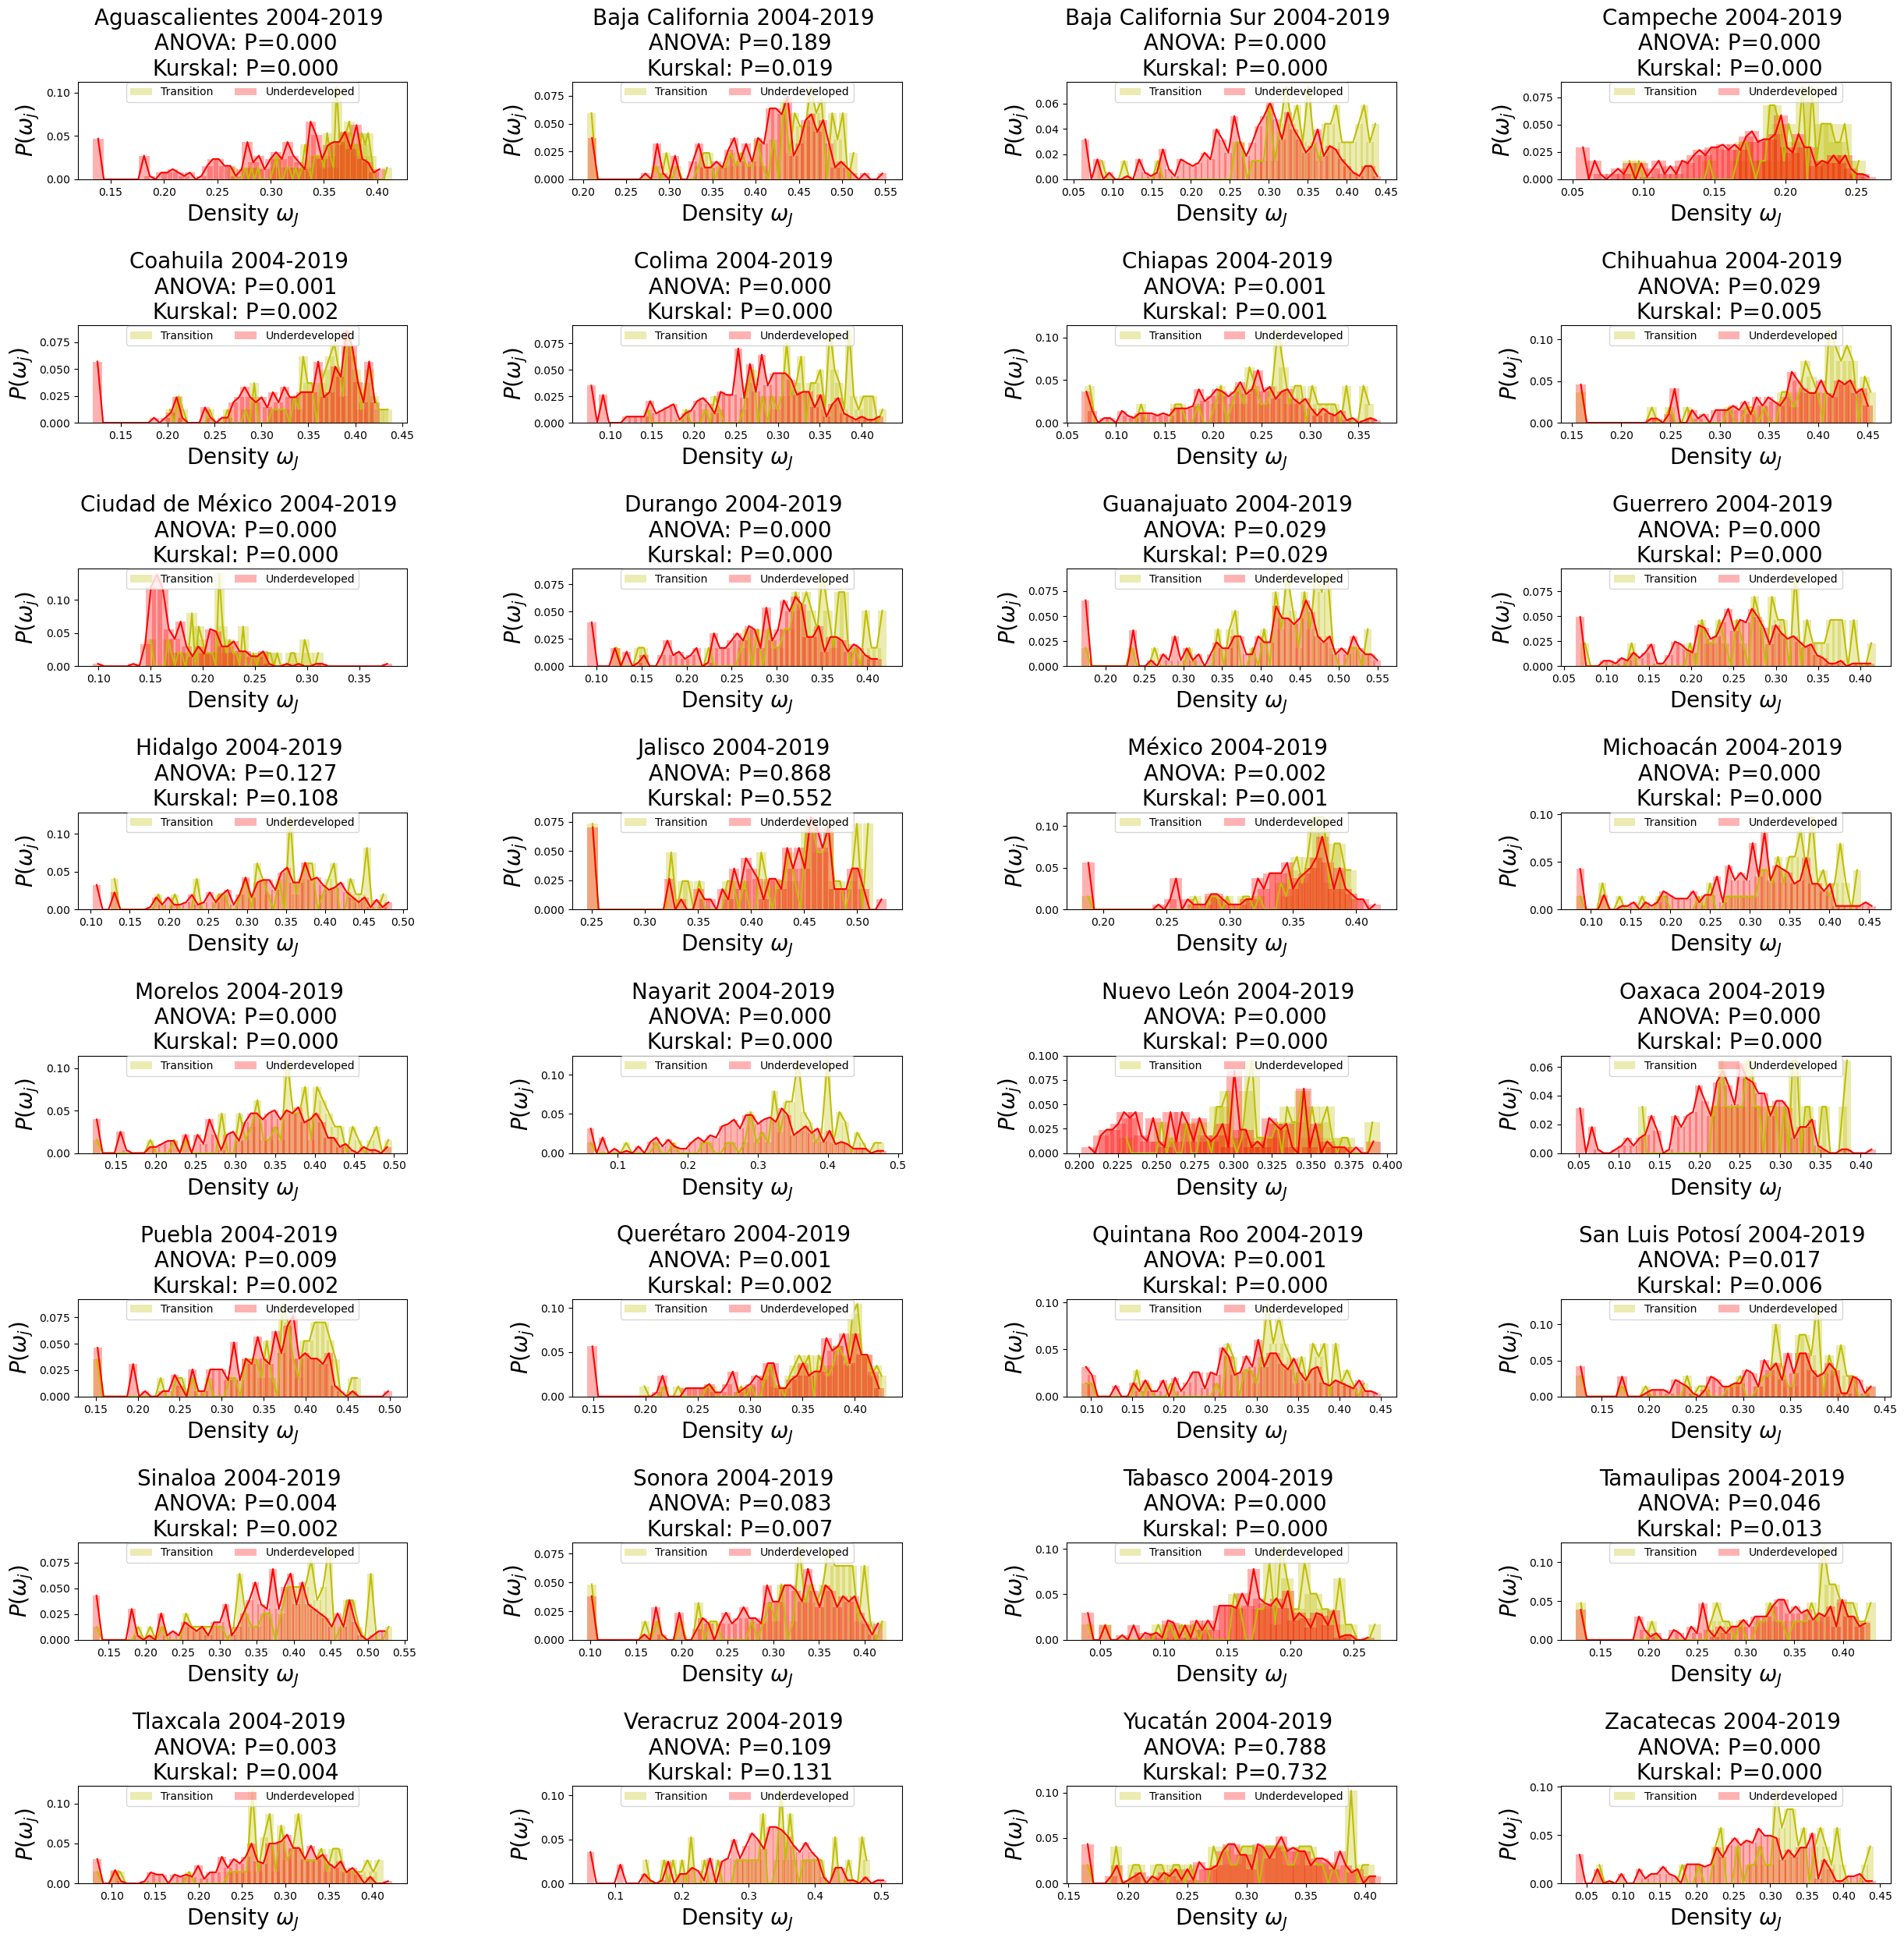

Estado    Periodo  ANOVA_flag  Kurskal_flag
0        Aguascalientes  2004-2019           1             1
1       Baja California  2004-2019           0             1
2   Baja California Sur  2004-2019           1             1
3              Campeche  2004-2019           1             1
4              Coahuila  2004-2019           1             1
5                Colima  2004-2019           1             1
6               Chiapas  2004-2019           1             1
7             Chihuahua  2004-2019           1             1
8      Ciudad de México  2004-2019           1             1
9               Durango  2004-2019           1             1
10           Guanajuato  2004-2019           1             1
11             Guerrero  2004-2019           1             1
12              Hidalgo  2004-2019           0             0
13              Jalisco  2004-2019           0             0
14               México  2004-2019           1             1
15            Michoacán  2004-2019           1             1
16              Morelos  2004-2019           1             1
17              Nayarit  2004-2019           1             1
18           Nuevo León  2004-2019           1             1
19               Oaxaca  2004-2019           1             1
20               Puebla  2004-2019           1             1
21            Querétaro  2004-2019           1             1
22         Quintana Roo  2004-2019           1             1
23      San Luis Potosí  2004-2019           1             1
24              Sinaloa  2004-2019           1             1
25               Sonora  2004-2019           0             1
26              Tabasco  2004-2019           1             1
27           Tamaulipas  2004-2019           1             1
28             Tlaxcala  2004-2019           1             1
29             Veracruz  2004-2019           0             0
30              Yucatán  2004-2019           0             0
31            Zacatecas  2004-2019           1             1

In [6]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1.5, wspace=0.5)

axs = axs.ravel()

trans_df=Transition_04_19
under_df=underdeveloped_04_19
dens_df=density_2004
year1=2004
year2=2019

est_per_p_val=[]


for i,Estado in enumerate(Estados):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get density of transition and underdeveloped products

    dens_trans = []
    for prod in trans_prod:
        dens_trans.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])


    dens_under = []
    for prod in under_prod:
        dens_under.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])
    
    bins=50
    
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=bins,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=bins,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    #plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    #plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    #plt.xlabel(r'$\omega_j$',size=20)
    #plt.ylabel(r'$P(\omega_j)$',size=20)
    #plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    #plt.legend()
    #plt.show()
    
    axs[i].plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y')
    axs[i].bar(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,
               alpha=0.3,width=0.01,color='y',label= 'Transition')
    
    axs[i].plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r')
    axs[i].bar(base_dens_under[1:len(base_dens_under)],prob_dens_under,
               alpha=0.3,width=0.01,color='r',label= 'Underdeveloped')
    
    
    axs[i].set_xlabel(r'Density $\omega_J$',size=20)
    axs[i].set_ylabel(r'$P(\omega_j)$',size=20)
    axs[i].set_title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}'
                     ,size=20)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2)
    
    p_anova_flag=1
    if p_valor_ANOVA>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_anova_flag=0
        
    p_kurskal_flag=1
    if p_valor_kurskal>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_kurskal_flag=0
    
    period_str=f'{year1}-{year2}'
        
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
plt.show()
    
df_04_19=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','ANOVA_flag','Kurskal_flag'])
df_04_19


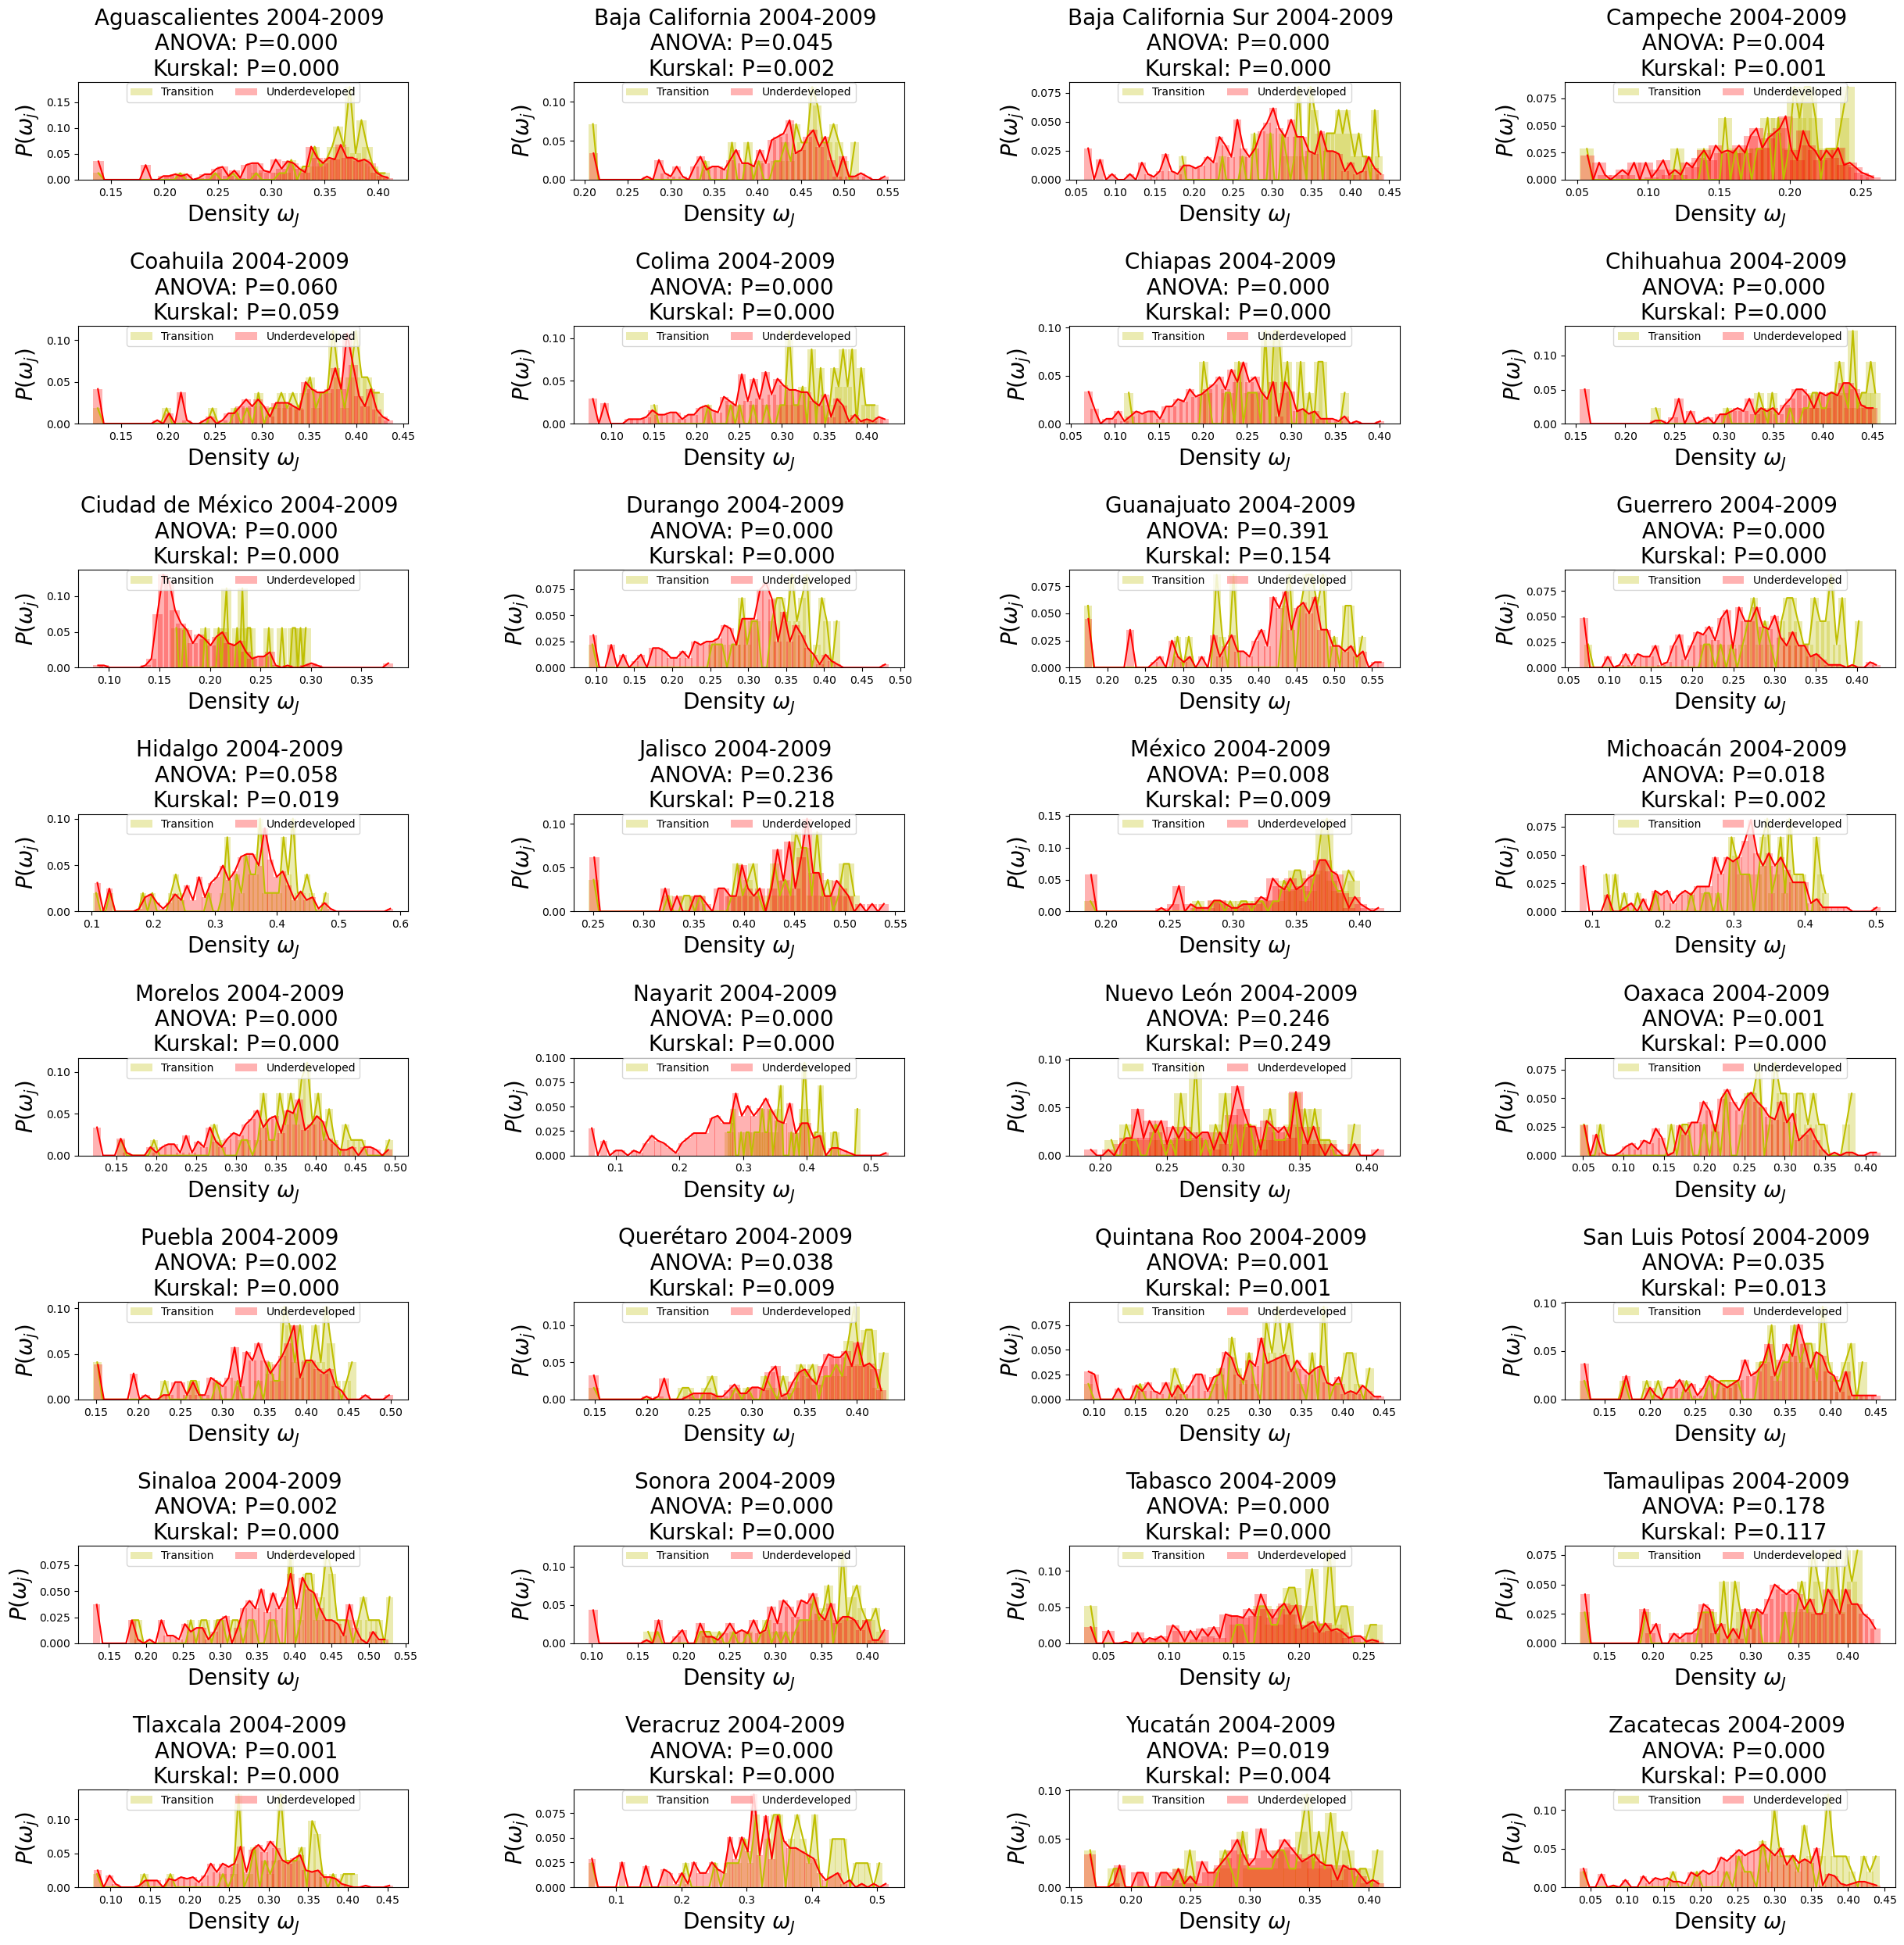

Estado    Periodo  ANOVA_flag  Kurskal_flag
0        Aguascalientes  2004-2009           1             1
1       Baja California  2004-2009           1             1
2   Baja California Sur  2004-2009           1             1
3              Campeche  2004-2009           1             1
4              Coahuila  2004-2009           0             0
5                Colima  2004-2009           1             1
6               Chiapas  2004-2009           1             1
7             Chihuahua  2004-2009           1             1
8      Ciudad de México  2004-2009           1             1
9               Durango  2004-2009           1             1
10           Guanajuato  2004-2009           0             0
11             Guerrero  2004-2009           1             1
12              Hidalgo  2004-2009           0             1
13              Jalisco  2004-2009           0             0
14               México  2004-2009           1             1
15            Michoacán  2004-2009           1             1
16              Morelos  2004-2009           1             1
17              Nayarit  2004-2009           1             1
18           Nuevo León  2004-2009           0             0
19               Oaxaca  2004-2009           1             1
20               Puebla  2004-2009           1             1
21            Querétaro  2004-2009           1             1
22         Quintana Roo  2004-2009           1             1
23      San Luis Potosí  2004-2009           1             1
24              Sinaloa  2004-2009           1             1
25               Sonora  2004-2009           1             1
26              Tabasco  2004-2009           1             1
27           Tamaulipas  2004-2009           0             0
28             Tlaxcala  2004-2009           1             1
29             Veracruz  2004-2009           1             1
30              Yucatán  2004-2009           1             1
31            Zacatecas  2004-2009           1             1

In [7]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1.5, wspace=0.5)

axs = axs.ravel()

trans_df=Transition_04_09
under_df=underdeveloped_04_09
dens_df=density_2004
year1=2004
year2=2009

est_per_p_val=[]


for i,Estado in enumerate(Estados):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get density of transition and underdeveloped products

    dens_trans = []
    for prod in trans_prod:
        dens_trans.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])


    dens_under = []
    for prod in under_prod:
        dens_under.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])
    
    bins=50
    
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=bins,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=bins,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    #plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    #plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    #plt.xlabel(r'$\omega_j$',size=20)
    #plt.ylabel(r'$P(\omega_j)$',size=20)
    #plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    #plt.legend()
    #plt.show()
    
    axs[i].plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y')
    axs[i].bar(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,
               alpha=0.3,width=0.01,color='y',label= 'Transition')
    
    axs[i].plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r')
    axs[i].bar(base_dens_under[1:len(base_dens_under)],prob_dens_under,
               alpha=0.3,width=0.01,color='r',label= 'Underdeveloped')
    
    
    axs[i].set_xlabel(r'Density $\omega_J$',size=20)
    axs[i].set_ylabel(r'$P(\omega_j)$',size=20)
    axs[i].set_title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}'
                     ,size=20)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2)
    
    p_anova_flag=1
    if p_valor_ANOVA>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_anova_flag=0
        
    p_kurskal_flag=1
    if p_valor_kurskal>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_kurskal_flag=0
    
    period_str=f'{year1}-{year2}'
        
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
plt.show()
    
df_04_09=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','ANOVA_flag','Kurskal_flag'])
df_04_09


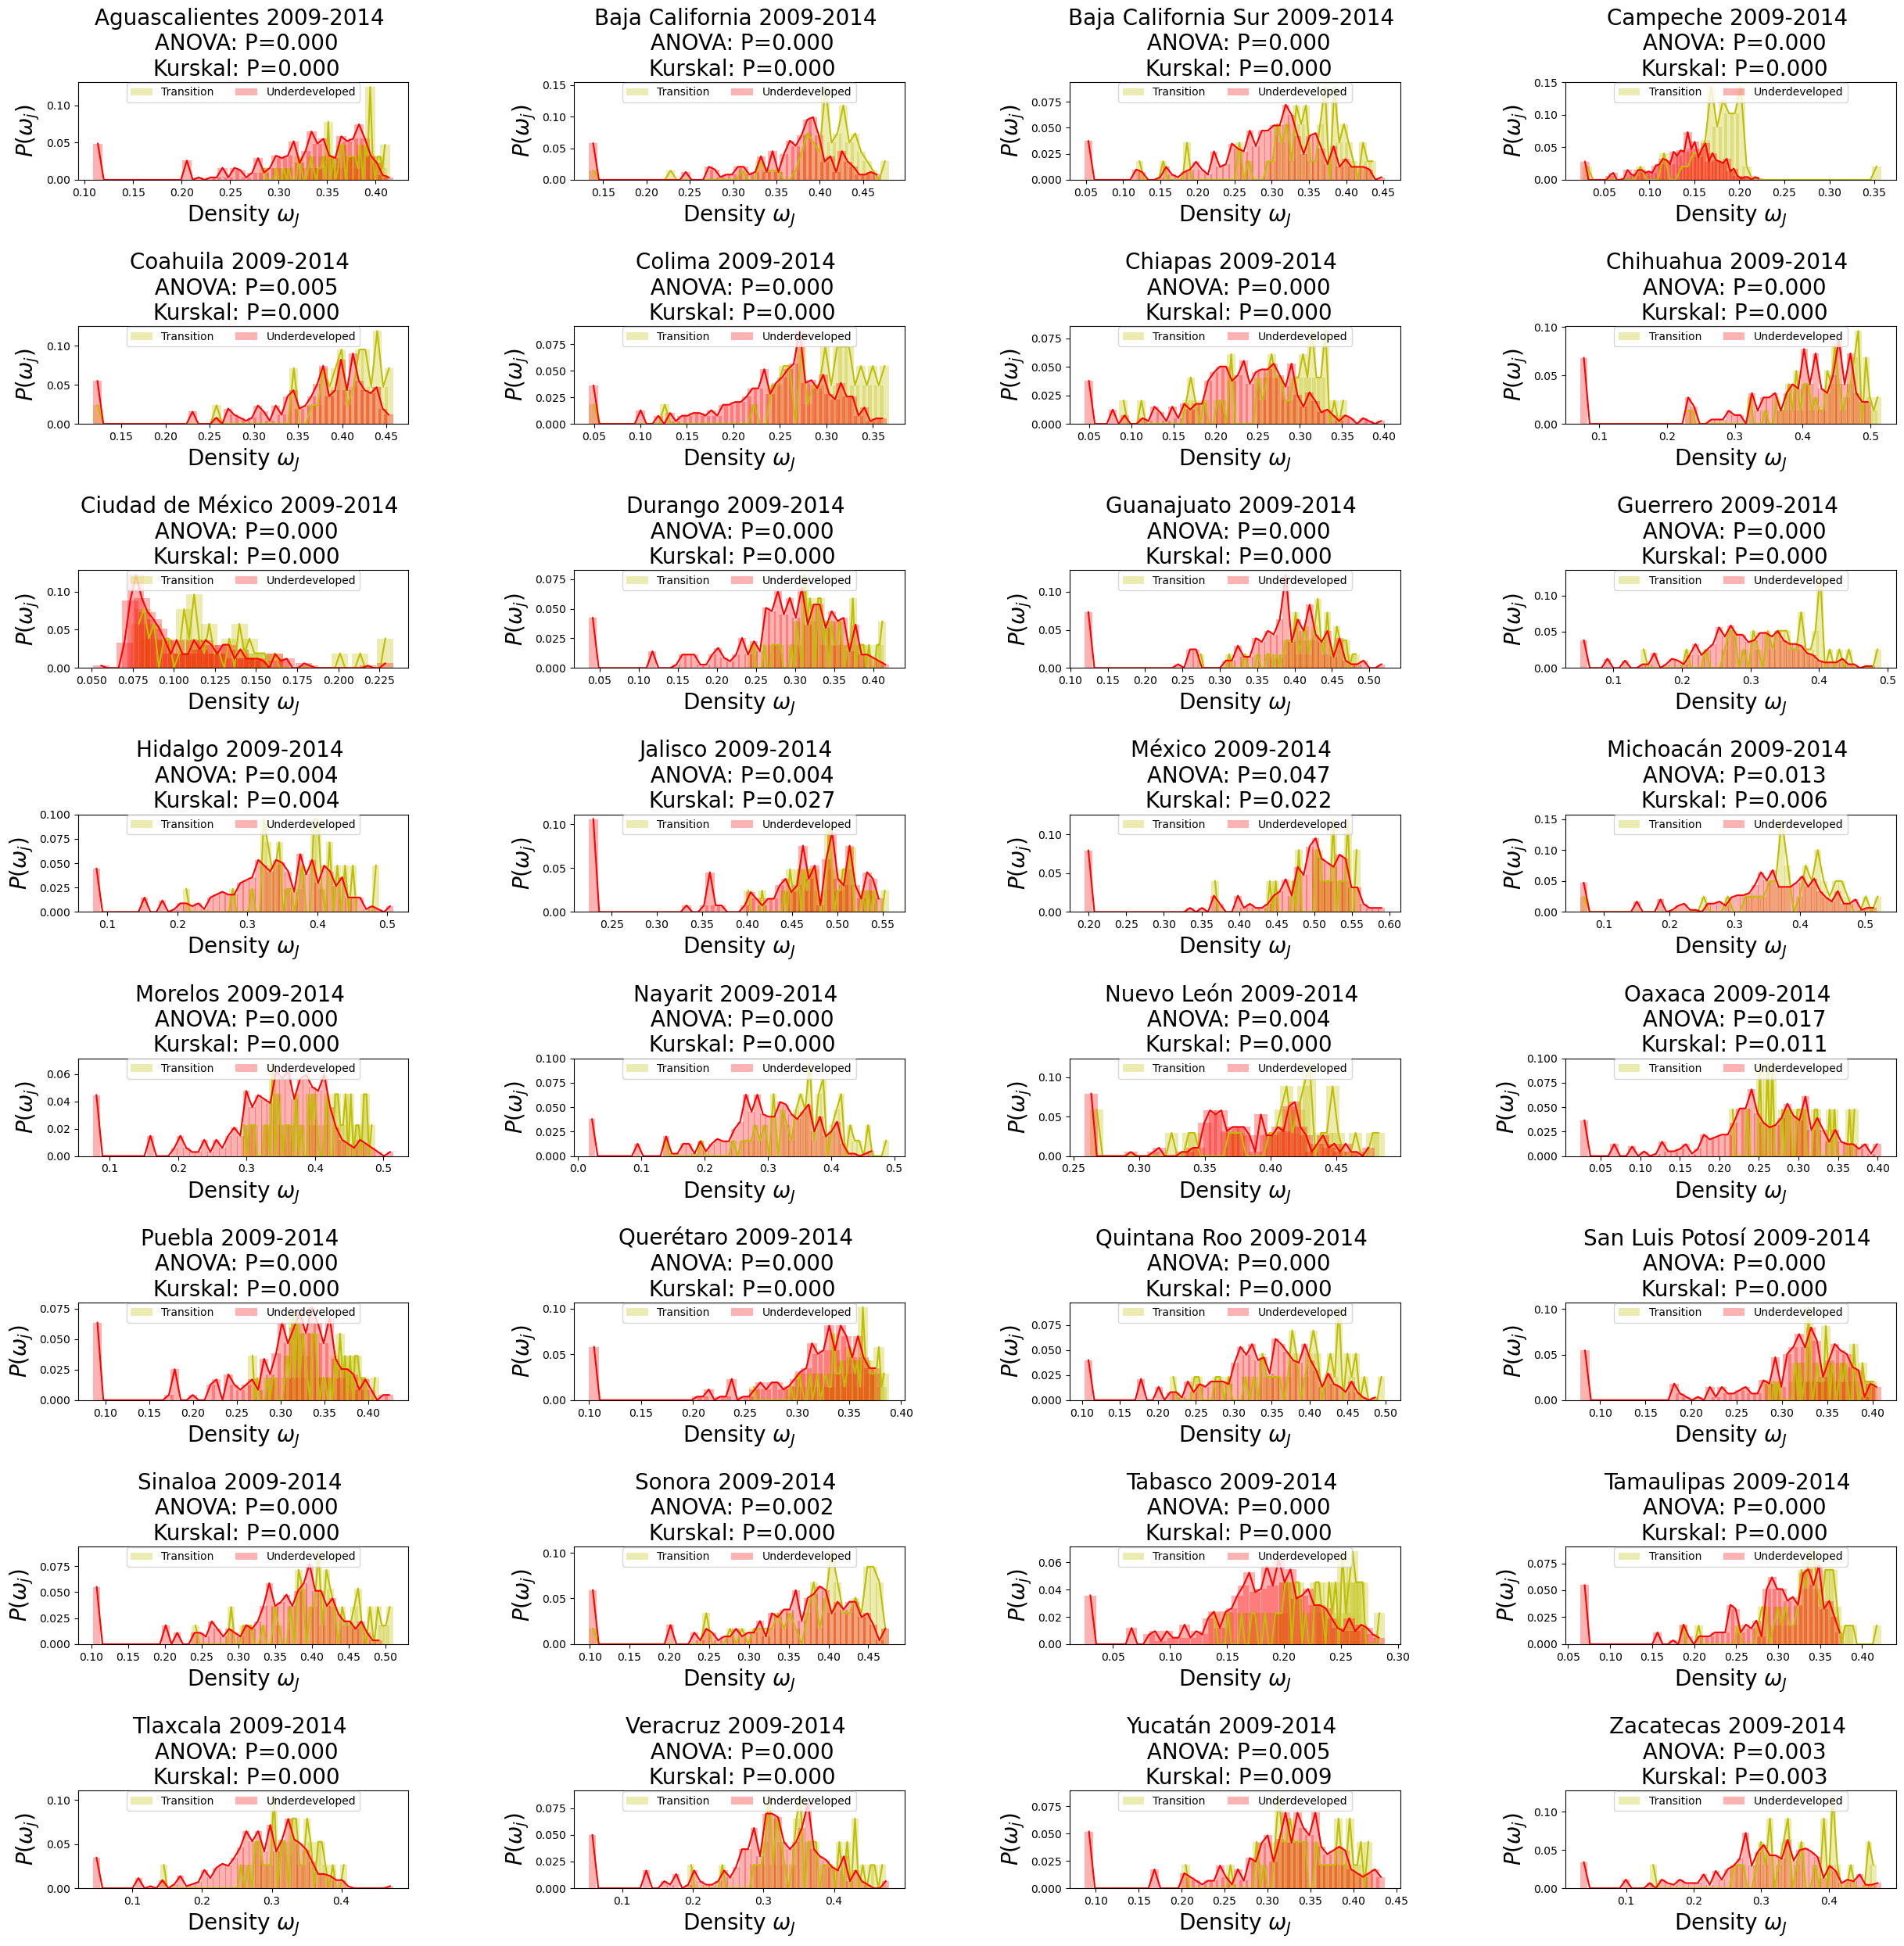

Estado    Periodo  ANOVA_flag  Kurskal_flag
0        Aguascalientes  2009-2014           1             1
1       Baja California  2009-2014           1             1
2   Baja California Sur  2009-2014           1             1
3              Campeche  2009-2014           1             1
4              Coahuila  2009-2014           1             1
5                Colima  2009-2014           1             1
6               Chiapas  2009-2014           1             1
7             Chihuahua  2009-2014           1             1
8      Ciudad de México  2009-2014           1             1
9               Durango  2009-2014           1             1
10           Guanajuato  2009-2014           1             1
11             Guerrero  2009-2014           1             1
12              Hidalgo  2009-2014           1             1
13              Jalisco  2009-2014           1             1
14               México  2009-2014           1             1
15            Michoacán  2009-2014           1             1
16              Morelos  2009-2014           1             1
17              Nayarit  2009-2014           1             1
18           Nuevo León  2009-2014           1             1
19               Oaxaca  2009-2014           1             1
20               Puebla  2009-2014           1             1
21            Querétaro  2009-2014           1             1
22         Quintana Roo  2009-2014           1             1
23      San Luis Potosí  2009-2014           1             1
24              Sinaloa  2009-2014           1             1
25               Sonora  2009-2014           1             1
26              Tabasco  2009-2014           1             1
27           Tamaulipas  2009-2014           1             1
28             Tlaxcala  2009-2014           1             1
29             Veracruz  2009-2014           1             1
30              Yucatán  2009-2014           1             1
31            Zacatecas  2009-2014           1             1

In [8]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1.5, wspace=0.5)

axs = axs.ravel()

trans_df=Transition_09_14
under_df=underdeveloped_09_14
dens_df=density_2009
year1=2009
year2=2014

est_per_p_val=[]


for i,Estado in enumerate(Estados):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get density of transition and underdeveloped products

    dens_trans = []
    for prod in trans_prod:
        dens_trans.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])


    dens_under = []
    for prod in under_prod:
        dens_under.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])
    
    bins=50
    
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=bins,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=bins,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    #plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    #plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    #plt.xlabel(r'$\omega_j$',size=20)
    #plt.ylabel(r'$P(\omega_j)$',size=20)
    #plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    #plt.legend()
    #plt.show()
    
    axs[i].plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y')
    axs[i].bar(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,
               alpha=0.3,width=0.01,color='y',label= 'Transition')
    
    axs[i].plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r')
    axs[i].bar(base_dens_under[1:len(base_dens_under)],prob_dens_under,
               alpha=0.3,width=0.01,color='r',label= 'Underdeveloped')
    
    
    axs[i].set_xlabel(r'Density $\omega_J$',size=20)
    axs[i].set_ylabel(r'$P(\omega_j)$',size=20)
    axs[i].set_title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}'
                     ,size=20)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2)
    
    p_anova_flag=1
    if p_valor_ANOVA>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_anova_flag=0
        
    p_kurskal_flag=1
    if p_valor_kurskal>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_kurskal_flag=0
    
    period_str=f'{year1}-{year2}'
        
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
plt.show()
    
df_09_14=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','ANOVA_flag','Kurskal_flag'])
df_09_14


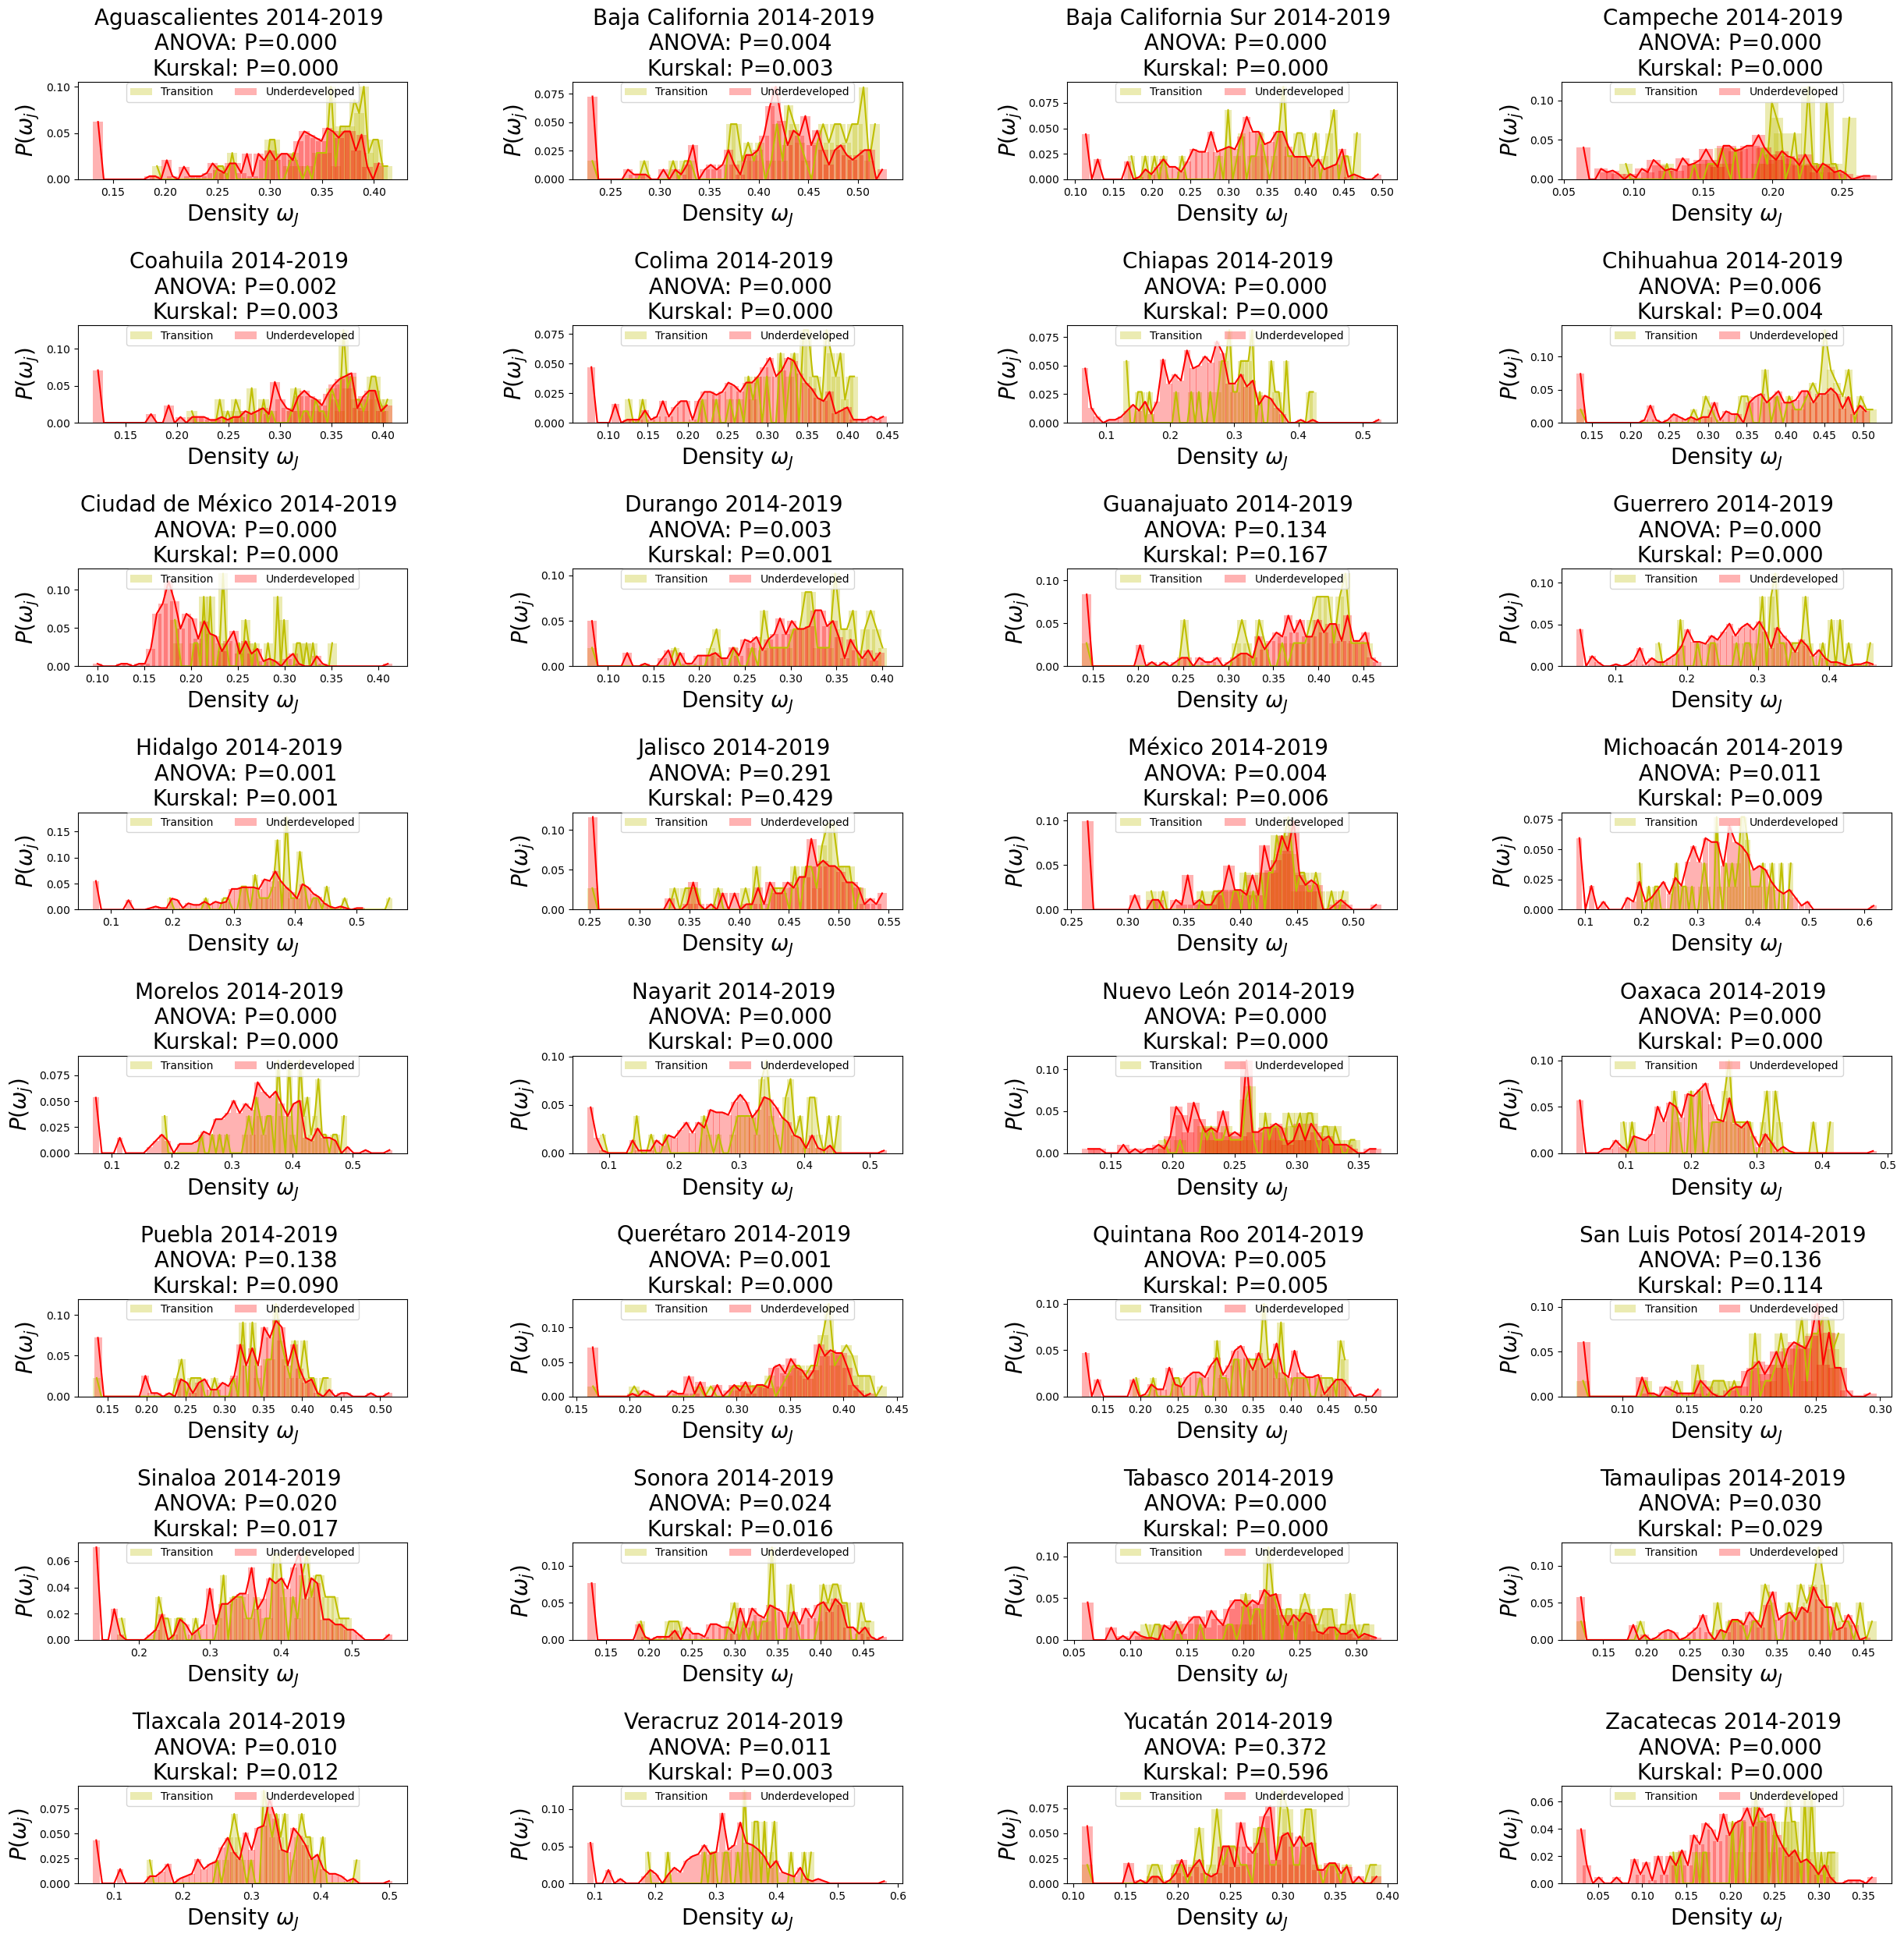

Estado    Periodo  ANOVA_flag  Kurskal_flag
0        Aguascalientes  2014-2019           1             1
1       Baja California  2014-2019           1             1
2   Baja California Sur  2014-2019           1             1
3              Campeche  2014-2019           1             1
4              Coahuila  2014-2019           1             1
5                Colima  2014-2019           1             1
6               Chiapas  2014-2019           1             1
7             Chihuahua  2014-2019           1             1
8      Ciudad de México  2014-2019           1             1
9               Durango  2014-2019           1             1
10           Guanajuato  2014-2019           0             0
11             Guerrero  2014-2019           1             1
12              Hidalgo  2014-2019           1             1
13              Jalisco  2014-2019           0             0
14               México  2014-2019           1             1
15            Michoacán  2014-2019           1             1
16              Morelos  2014-2019           1             1
17              Nayarit  2014-2019           1             1
18           Nuevo León  2014-2019           1             1
19               Oaxaca  2014-2019           1             1
20               Puebla  2014-2019           0             0
21            Querétaro  2014-2019           1             1
22         Quintana Roo  2014-2019           1             1
23      San Luis Potosí  2014-2019           0             0
24              Sinaloa  2014-2019           1             1
25               Sonora  2014-2019           1             1
26              Tabasco  2014-2019           1             1
27           Tamaulipas  2014-2019           1             1
28             Tlaxcala  2014-2019           1             1
29             Veracruz  2014-2019           1             1
30              Yucatán  2014-2019           0             0
31            Zacatecas  2014-2019           1             1

In [9]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1.5, wspace=0.5)

axs = axs.ravel()

trans_df=Transition_14_19
under_df=underdeveloped_14_19
dens_df=density_2014
year1=2014
year2=2019

est_per_p_val=[]


for i,Estado in enumerate(Estados):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get density of transition and underdeveloped products

    dens_trans = []
    for prod in trans_prod:
        dens_trans.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])


    dens_under = []
    for prod in under_prod:
        dens_under.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])
    
    bins=50
    
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=bins,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=bins,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    #plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    #plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    #plt.xlabel(r'$\omega_j$',size=20)
    #plt.ylabel(r'$P(\omega_j)$',size=20)
    #plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    #plt.legend()
    #plt.show()
    
    axs[i].plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y')
    axs[i].bar(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,
               alpha=0.3,width=0.01,color='y',label= 'Transition')
    
    axs[i].plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r')
    axs[i].bar(base_dens_under[1:len(base_dens_under)],prob_dens_under,
               alpha=0.3,width=0.01,color='r',label= 'Underdeveloped')
    
    
    axs[i].set_xlabel(r'Density $\omega_J$',size=20)
    axs[i].set_ylabel(r'$P(\omega_j)$',size=20)
    axs[i].set_title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}'
                     ,size=20)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2)
    
    p_anova_flag=1
    if p_valor_ANOVA>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_anova_flag=0
        
    p_kurskal_flag=1
    if p_valor_kurskal>0.05:
        #print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_kurskal_flag=0
    
    period_str=f'{year1}-{year2}'
        
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
plt.show()
    
df_14_19=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','ANOVA_flag','Kurskal_flag'])
df_14_19


Text(0.5, 1.0, 'ANOVA test (cae)')

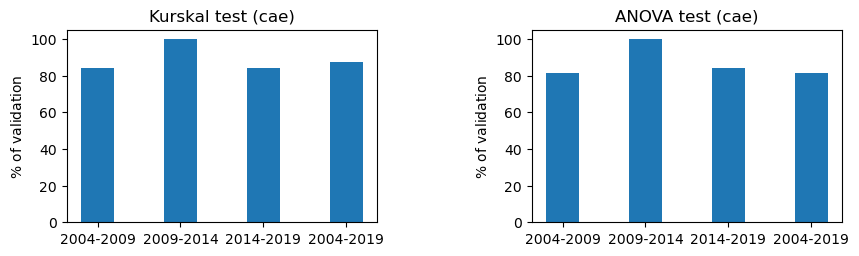

In [11]:
df_04_09.to_csv('ANOVA_Kurskal_test/ANOVA_Kurskal_test_04_09.csv')
df_09_14.to_csv('ANOVA_Kurskal_test/ANOVA_Kurskal_test_09_14.csv')
df_14_19.to_csv('ANOVA_Kurskal_test/ANOVA_Kurskal_test_14_19.csv')
df_14_19.to_csv('ANOVA_Kurskal_test/ANOVA_Kurskal_test_14_19.csv')


valid_kurskal_2004_2009=df_04_09["Kurskal_flag"].sum()/32*100

valid_anova_2004_2009=df_04_09["ANOVA_flag"].sum()/32*100

valid_kurskal_2009_2014=df_09_14["Kurskal_flag"].sum()/32*100

valid_anova_2009_2014=df_09_14["ANOVA_flag"].sum()/32*100

valid_kurskal_2014_2019=df_14_19["Kurskal_flag"].sum()/32*100

valid_anova_2014_2019=df_14_19["ANOVA_flag"].sum()/32*100

valid_kurskal_2004_2019=df_04_19["Kurskal_flag"].sum()/32*100

valid_anova_2004_2019=df_04_19["ANOVA_flag"].sum()/32*100

fig, axs = plt.subplots(1,2, figsize=(10, 2.5), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()

valid_kurskal_percentage=[valid_kurskal_2004_2009,
                 valid_kurskal_2009_2014,
                 valid_kurskal_2014_2019,
                 valid_kurskal_2004_2019]

valid_anova_percentage=[valid_anova_2004_2009,
                        valid_anova_2009_2014,
                        valid_anova_2014_2019,
                        valid_anova_2004_2019]

axs[0].bar([0,2,4,6],valid_kurskal_percentage)
axs[0].set_xticks([0,2,4,6],["2004-2009","2009-2014","2014-2019","2004-2019"])
axs[0].set_ylabel(r"$\%$ of validation")
axs[0].set_title("Kurskal test (cae)")


axs[1].bar([0,2,4,6],valid_anova_percentage)
axs[1].set_xticks([0,2,4,6],["2004-2009","2009-2014","2014-2019","2004-2019"])
axs[1].set_ylabel(r"$\%$ of validation")
axs[1].set_title("ANOVA test (cae)")
